In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:

raw_train = pd.read_csv("C:/Users/AICA/Desktop/캐글_분류(개인수입 예측)/train.csv")
raw_test = pd.read_csv("C:/Users/AICA/Desktop/캐글_분류(개인수입 예측)/test.csv")


EDA는 많은분들이 잘 작성 해 주신 내용이 있어서 여러가지 데이터를 참고 했지만
최종적으로 다음 저자의 EDA가 큰 도움이 되었습니다.

https://github.com/Aditya-Mankar/Census-Income-Prediction

## Step 1: 기초 데이터 파악

## 데이터 정보
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준 (최종 학력)
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값, target variable)

In [4]:
# 데이터 살펴보기
raw_train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [5]:
# 데이터 구조
print('Rows: {} Columns: {}'.format(raw_train.shape[0], raw_train.shape[1]))

Rows: 29305 Columns: 16


In [6]:
# 데이터 타입
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [7]:
# 통계적 요약
raw_train.describe().T

,count,mean,std,min,25%,50%,75%,max
no,29305.0,14653.000000,8459.769156,1.0,7327.0,14653.0,21979.0,29305.0
age,29305.0,38.659171,13.743827,17.0,28.0,37.0,48.0,90.0
fnlwgt,29305.0,189735.663914,105634.776696,13769.0,117606.0,177955.0,237713.0,1490400.0
education-num,29305.0,10.083057,2.570371,1.0,9.0,10.0,12.0,16.0
capital-gain,29305.0,1084.531786,7495.715677,0.0,0.0,0.0,0.0,99999.0
capital-loss,29305.0,87.073571,401.225580,0.0,0.0,0.0,0.0,4356.0
hours-per-week,29305.0,40.440096,12.332840,1.0,40.0,40.0,45.0,99.0
income,29305.0,0.240403,0.427335,0.0,0.0,0.0,0.0,1.0


In [8]:
# null 값이 존재하는지 확인
round((raw_train.isnull().sum() / raw_train.shape[0]) * 100, 2).astype(str) + ' %'

no                0.0 %
age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
native-country    0.0 %
income            0.0 %
dtype: object

In [9]:
# '?'값이 얼마나 나타나는지
round((raw_train.isin(['?']).sum() / raw_train.shape[0])
      * 100, 2).astype(str) + ' %'

no                0.0 %
age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
native-country    0.0 %
income            0.0 %
dtype: object

In [10]:
# 소득 비율
income = raw_train['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

0    75.96 %
1    24.04 %
Name: income, dtype: object

## Step 2: 데이터 분석 시작

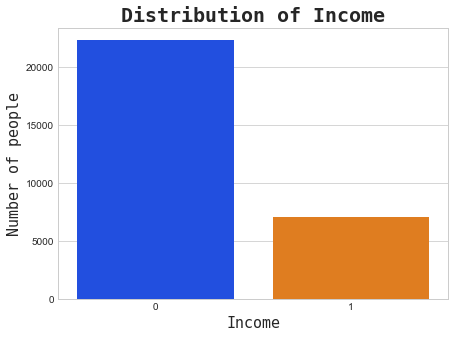

In [11]:
# Creating a barplot for 'Income'
income = raw_train['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

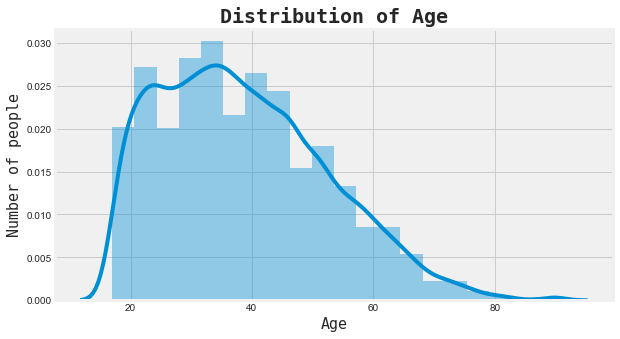

In [12]:
# Creating a distribution plot for 'Age'
age = raw_train['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(raw_train['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

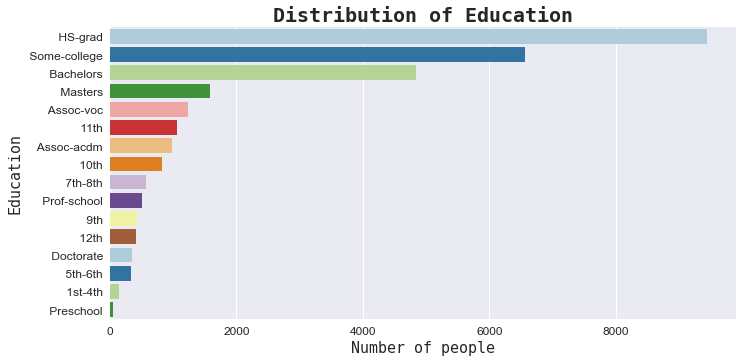

In [13]:
# Creating a barplot for 'Education'
edu = raw_train['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

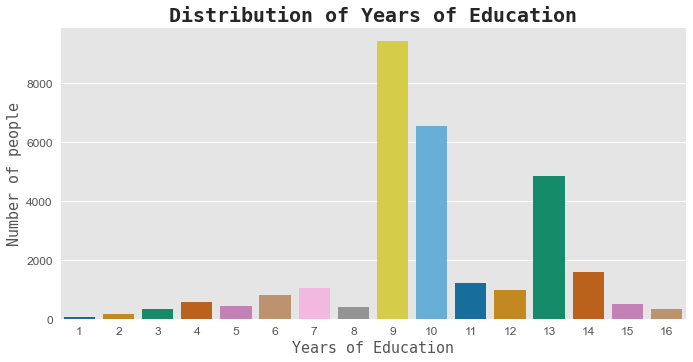

In [15]:
# Creating a barplot for 'Years of Education'
edu_num = raw_train['education-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

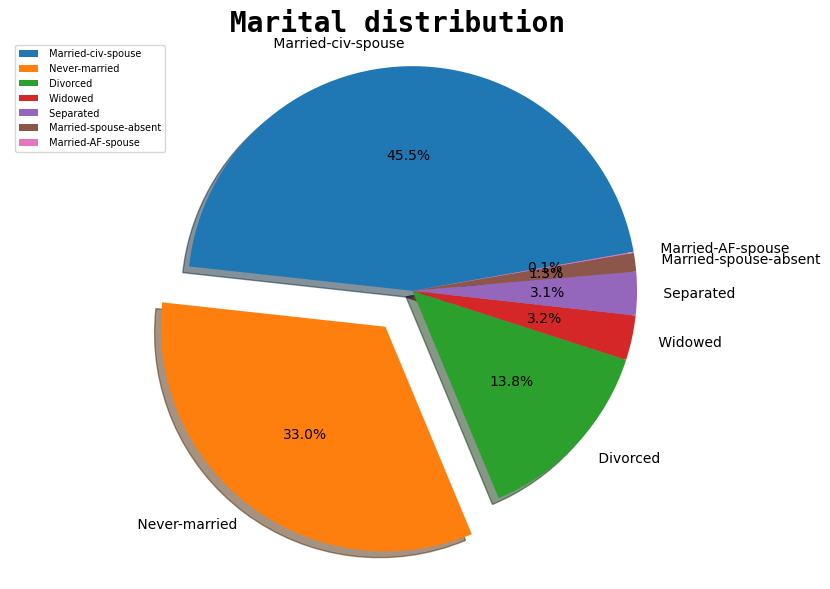

In [17]:
# Creating a pie chart for 'Marital status'
marital = raw_train['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

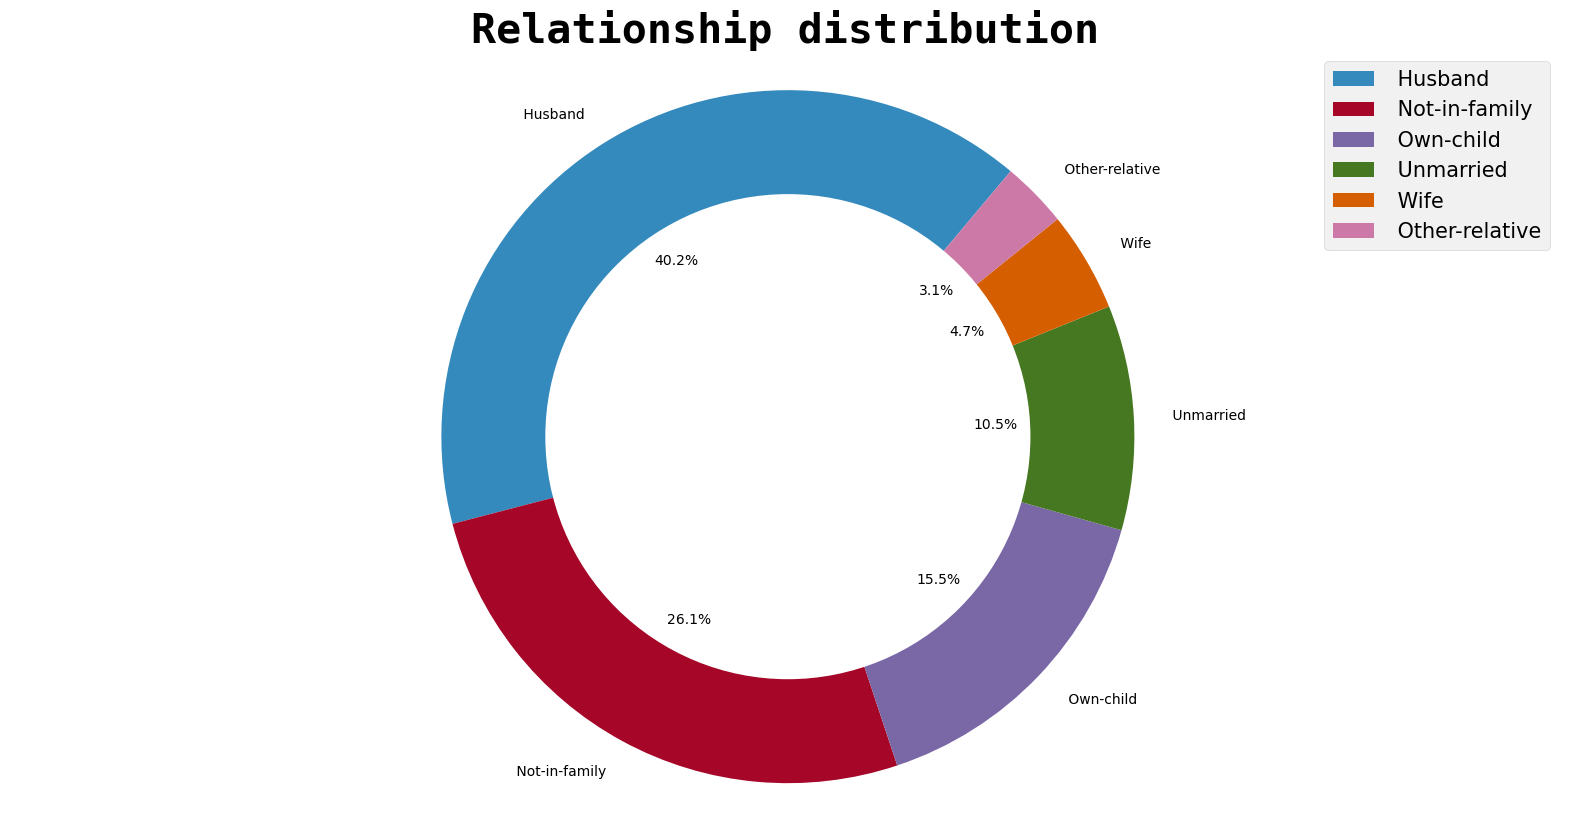

In [18]:
# Creating a donut chart for 'Age'
relation = raw_train['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

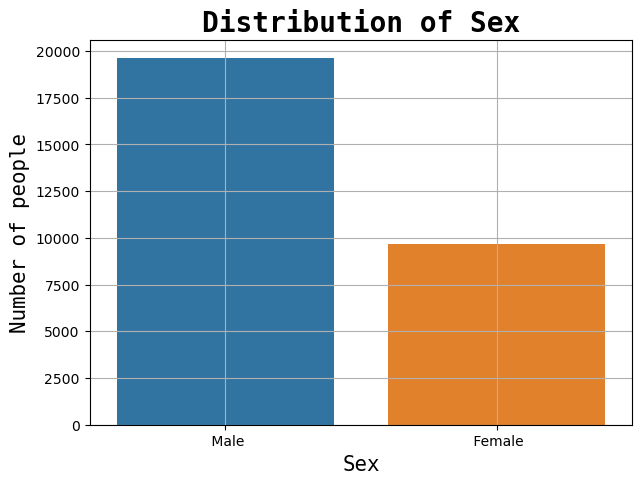

In [19]:
# Creating a barplot for 'Sex'
sex = raw_train['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

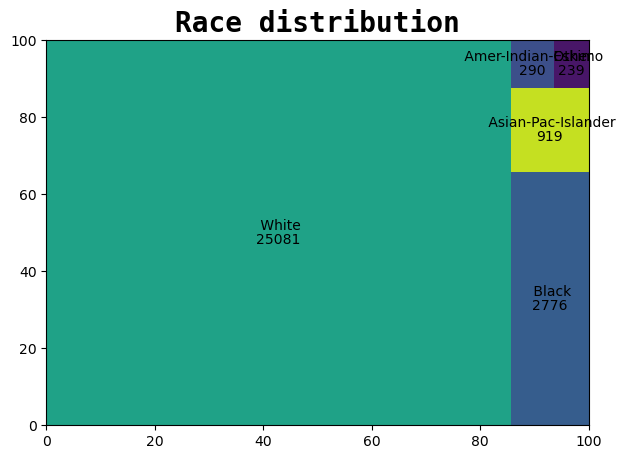

In [20]:
# Creating a Treemap for 'Race'
import squarify
race = raw_train['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

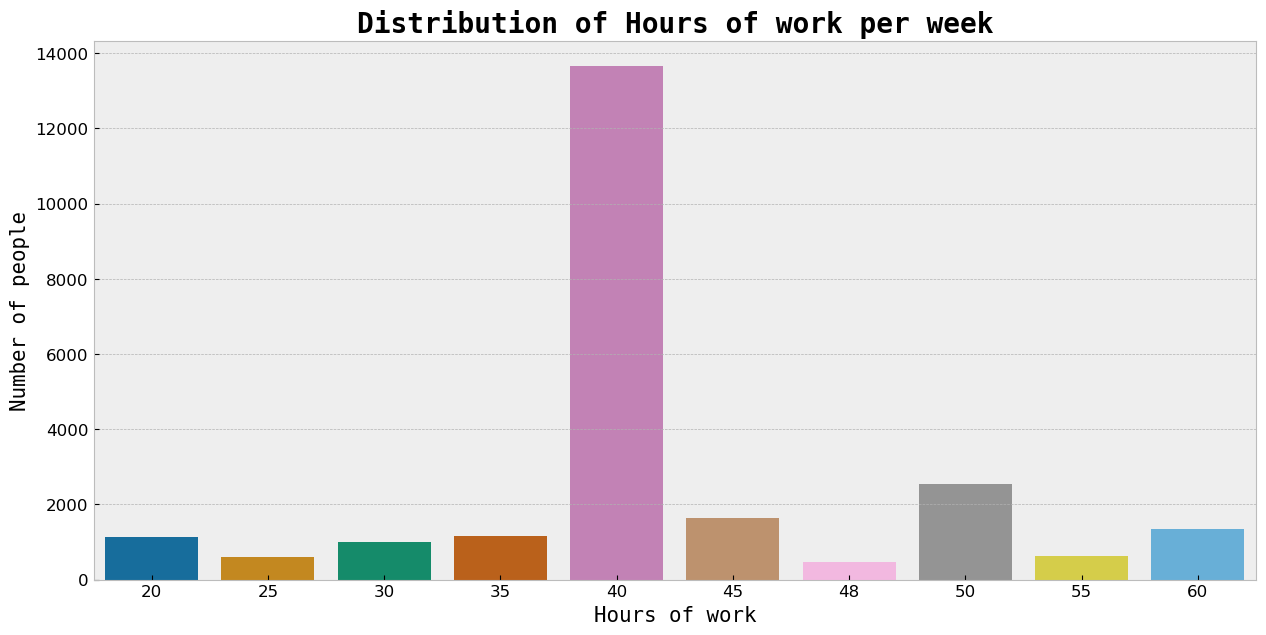

In [22]:
# Creating a barplot for 'Hours per week'
hours = raw_train['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

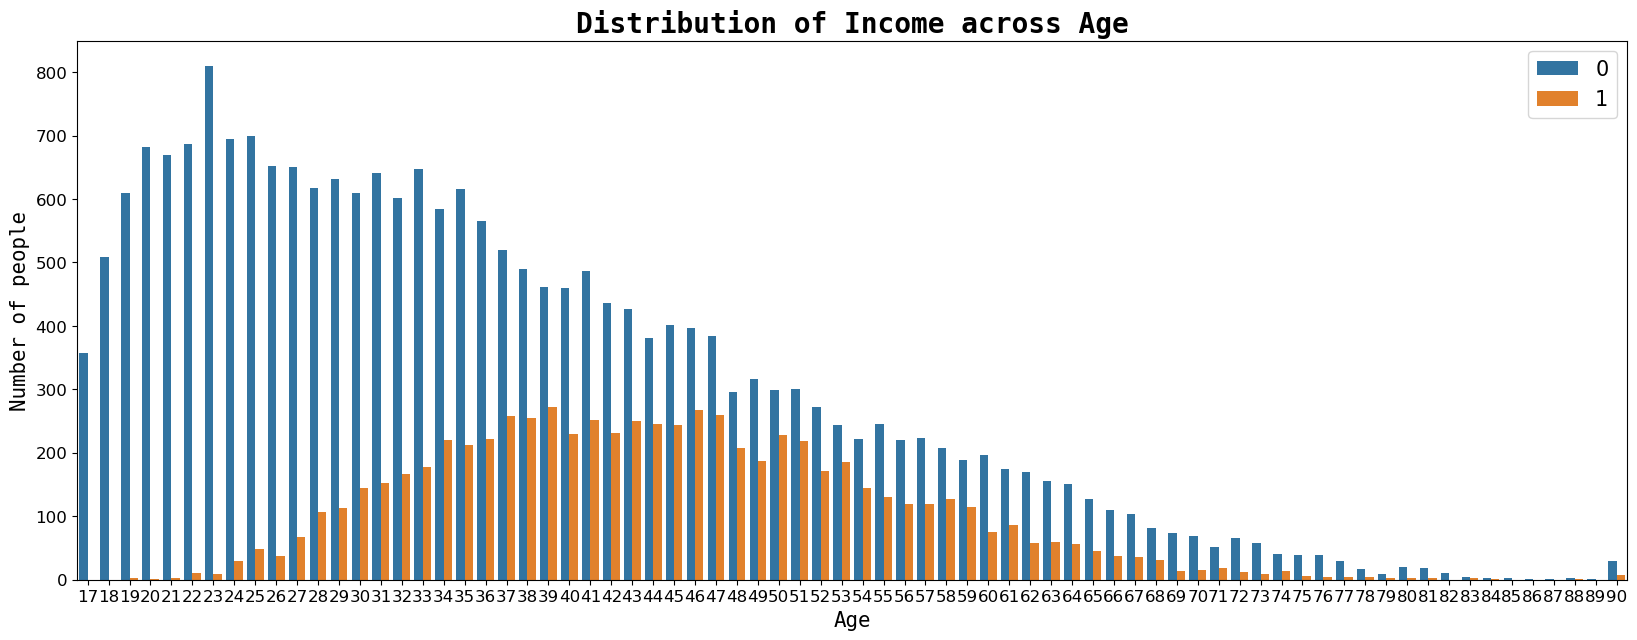

In [23]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(raw_train['age'], hue=raw_train['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

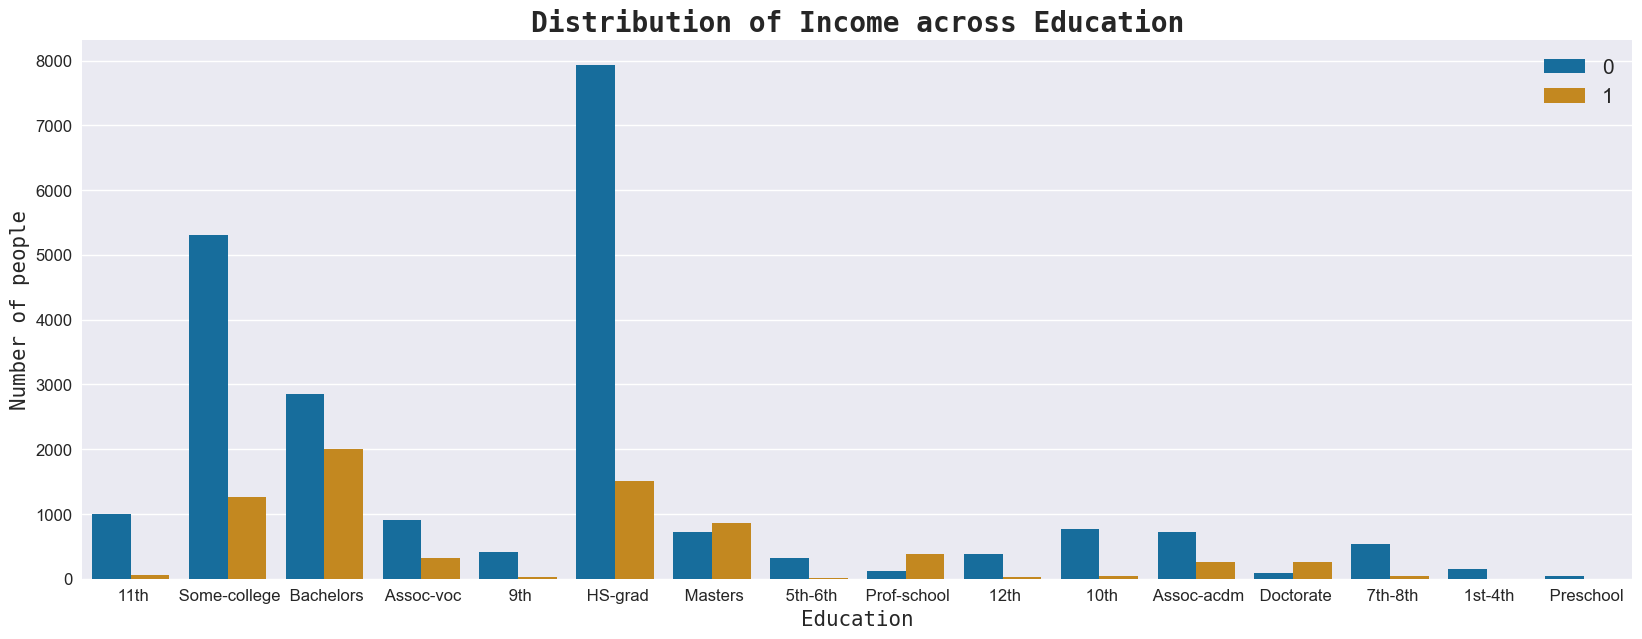

In [24]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(raw_train['education'],
              hue=raw_train['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

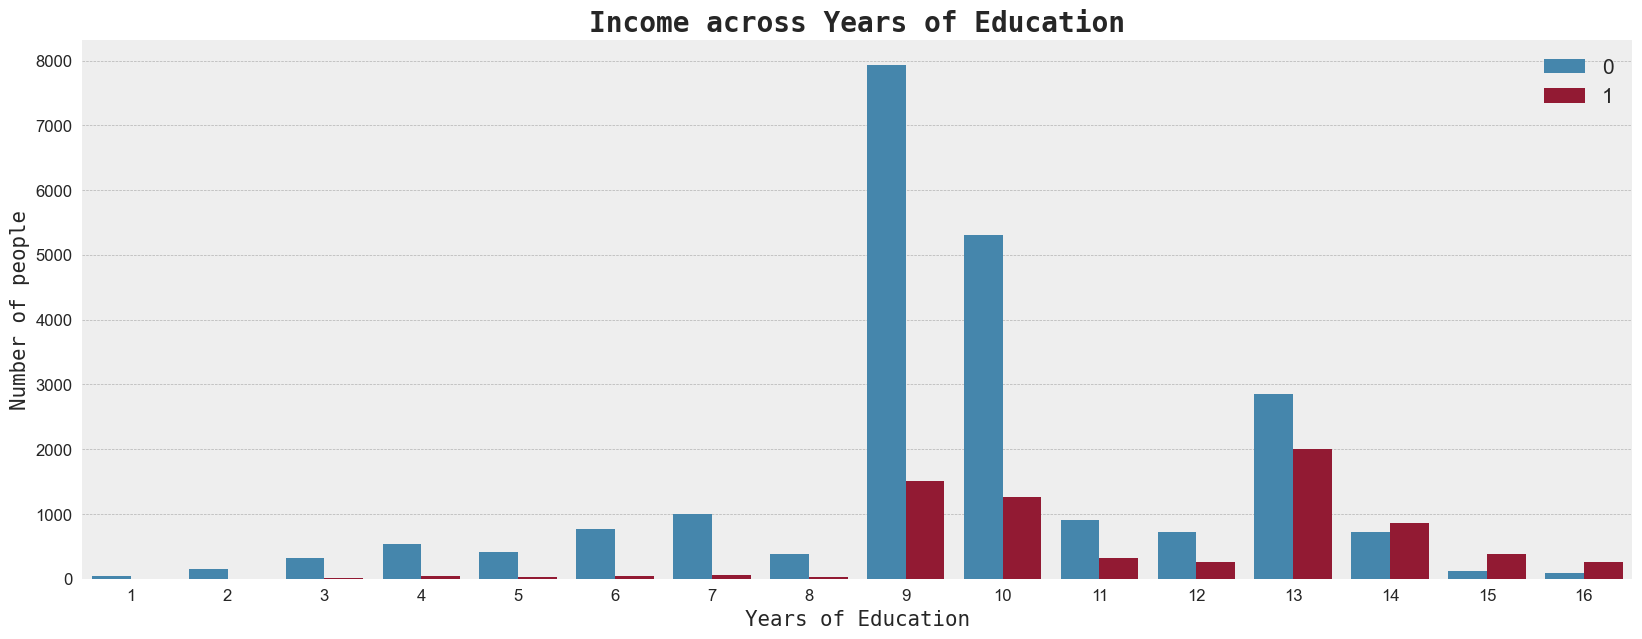

In [26]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(raw_train['education-num'],
              hue=raw_train['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

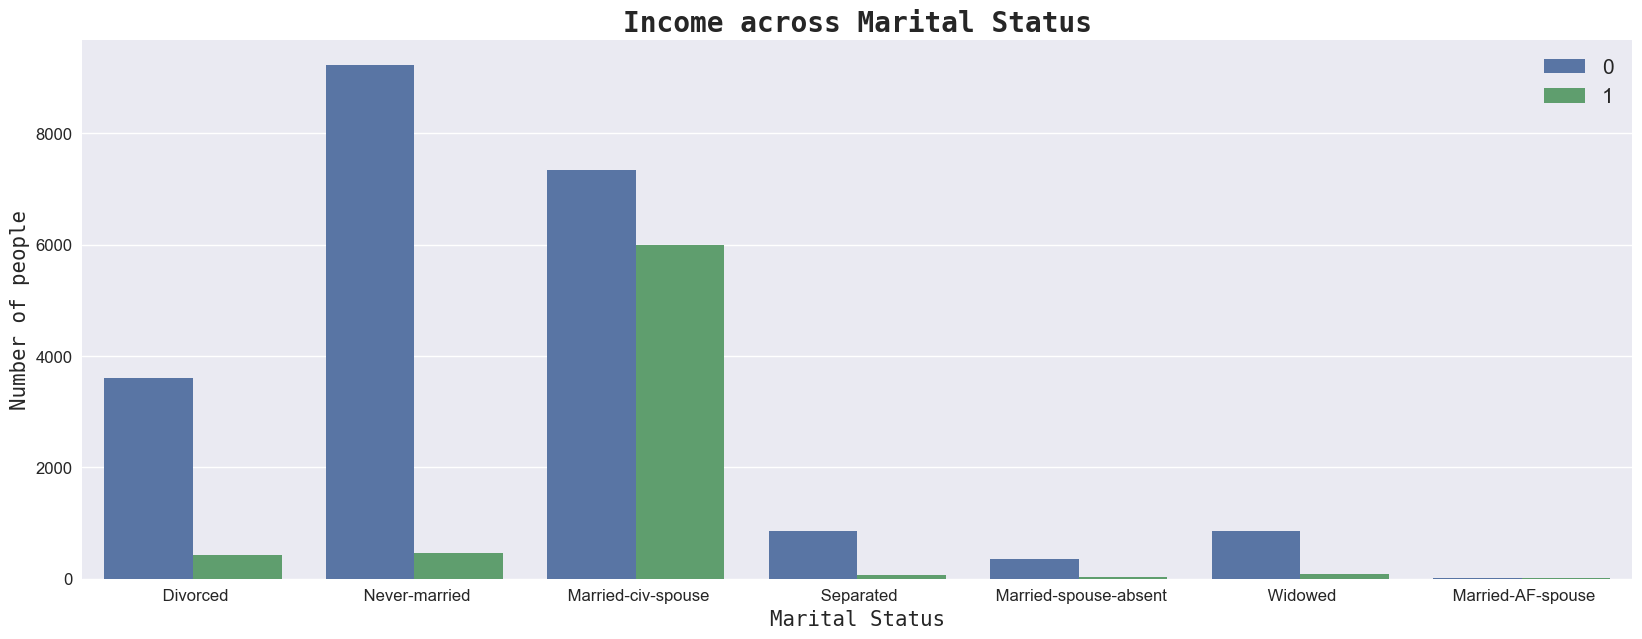

In [29]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(raw_train['marital-status'], hue=raw_train['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

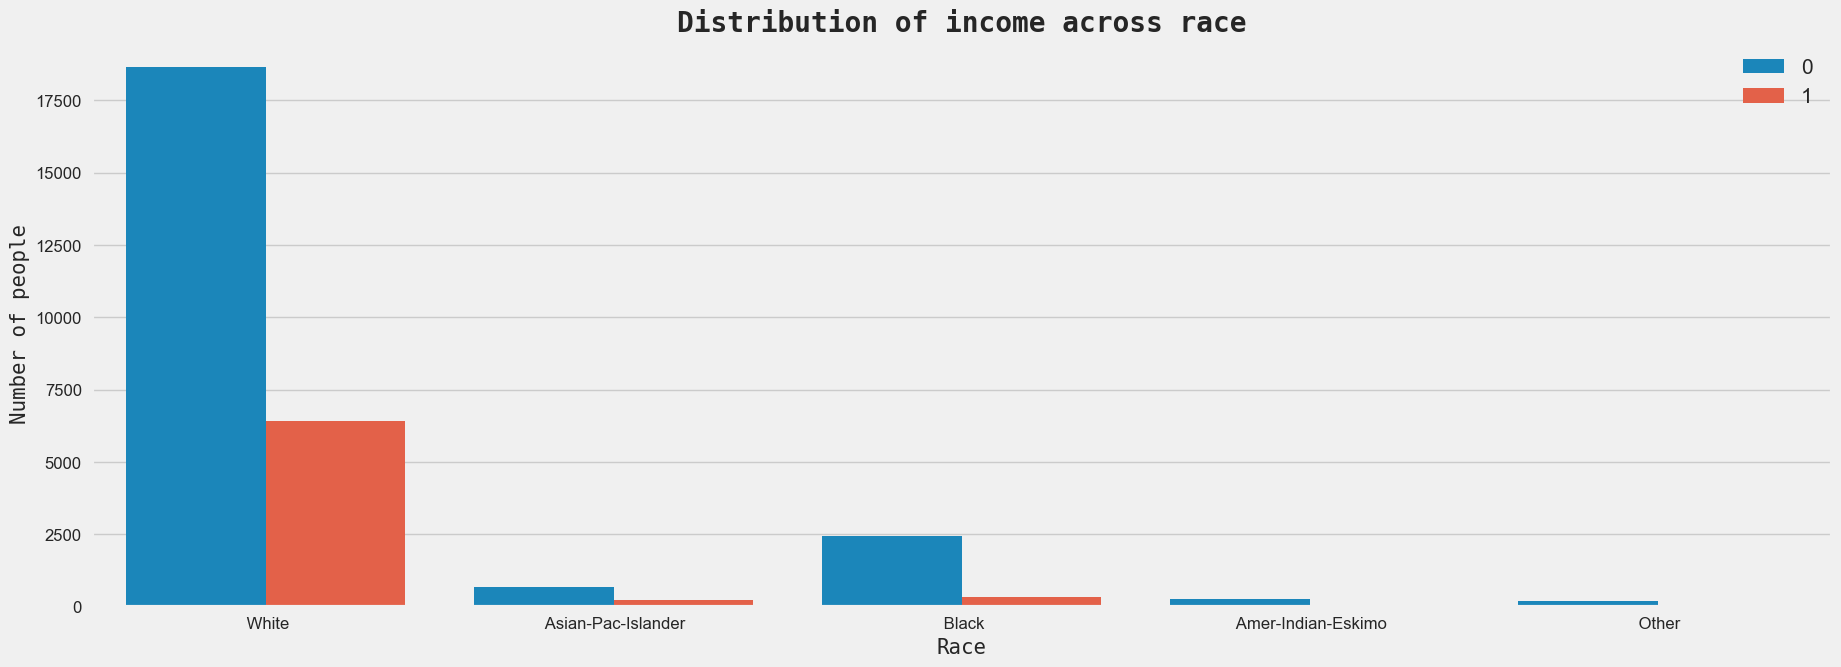

In [30]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(raw_train['race'], hue=raw_train['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

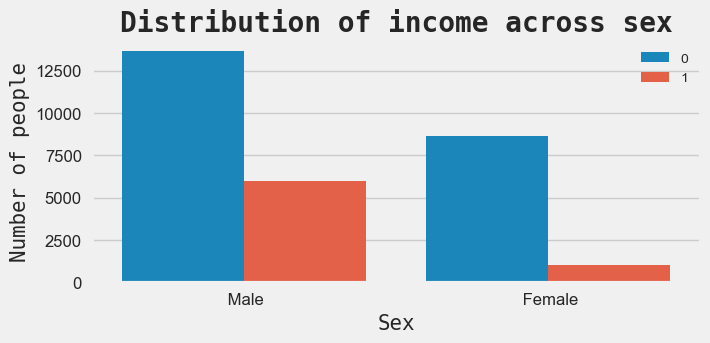

In [31]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(raw_train['sex'], hue=raw_train['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

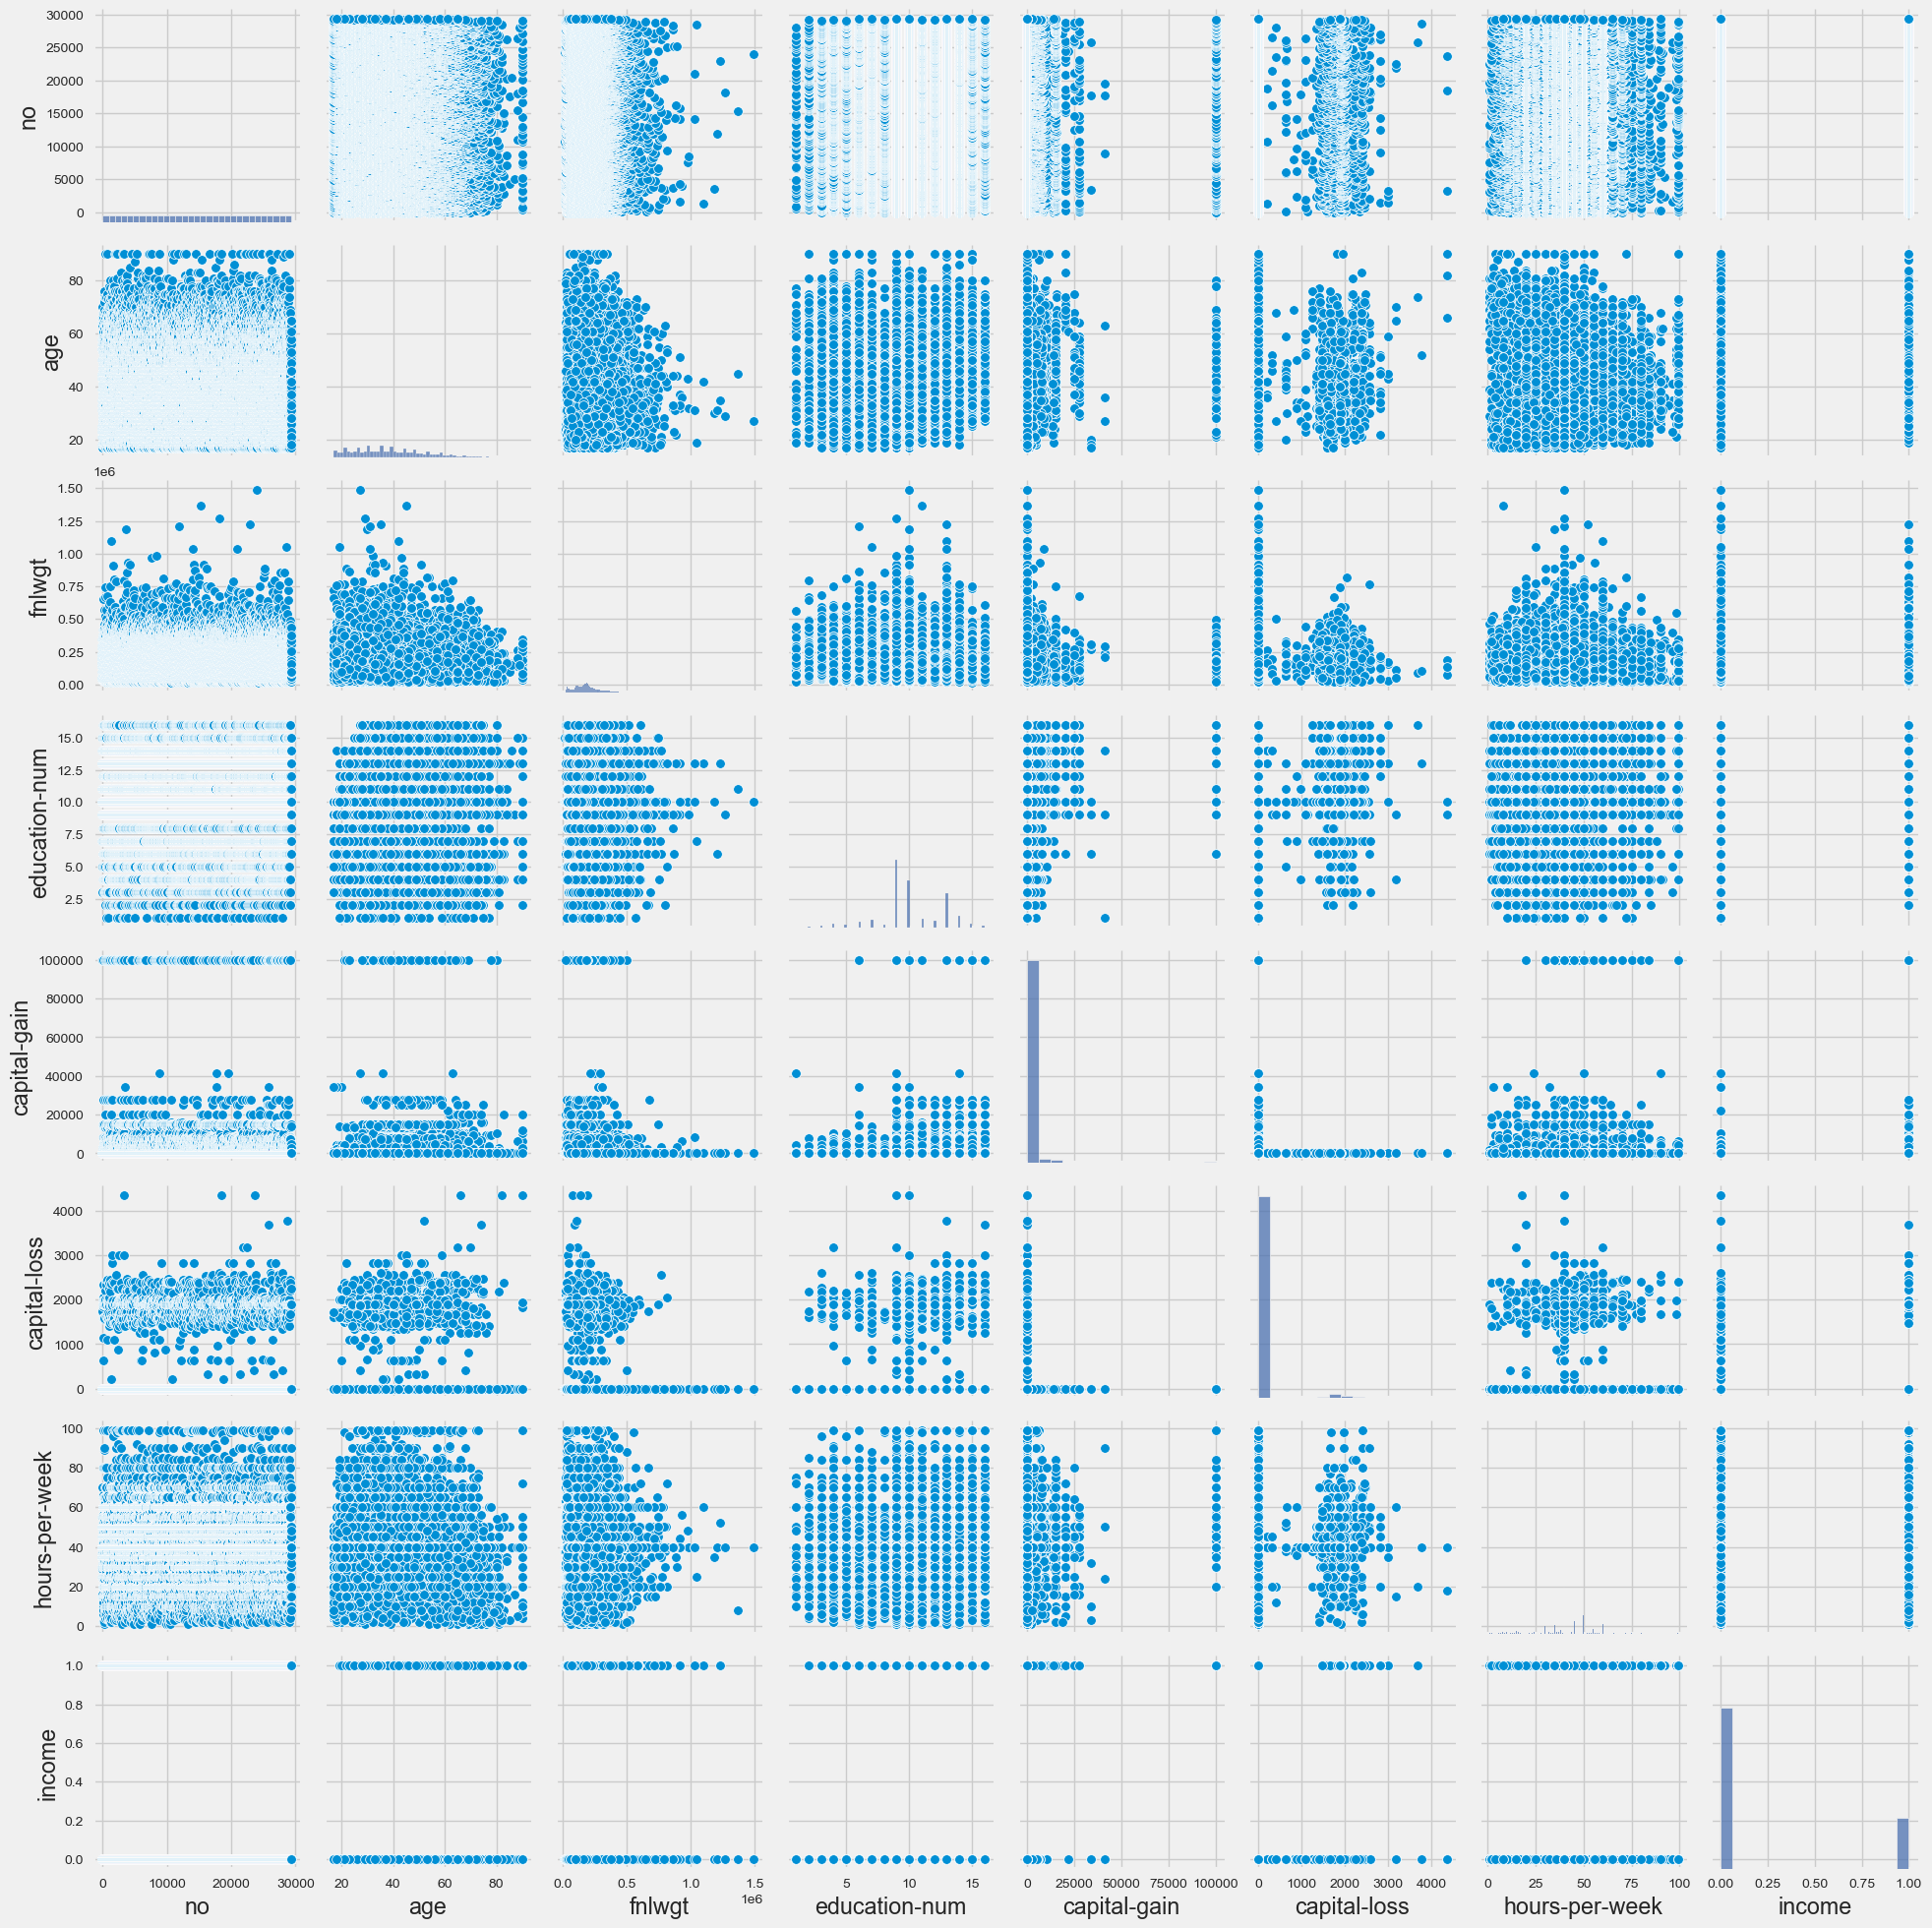

In [32]:
# Creating a pairplot of dataset
sns.pairplot(raw_train)
plt.savefig('multi1.png')
plt.show()

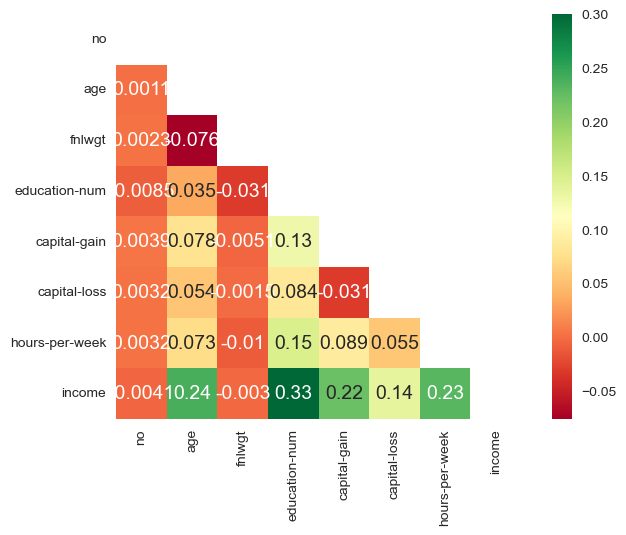

In [33]:
corr = raw_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

> ## Step 3: Pycaret 모델링

## PyCaret은 무엇입니까?

* PyCaret은 Python의 오픈 소스 로우 코드 머신러닝 라이브러리로, ML 실험에서 가설을 인사이트주기 시간으로 줄이는 것을 목표로합니다.
* 이를 통해 데이터 과학자는 종단 간 실험을 빠르고 효율적으로 수행 할 수 있습니다.
* 다른 오픈 소스 기계 학습 라이브러리와 비교하여 PyCaret은 코드 몇 줄만으로 복잡한 기계 학습 작업을 수행하는 데 사용할 수 있는 대체 로우 코드 라이브러리입니다.
* PyCaret은 간단하고 사용하기 쉽습니다.
* PyCaret에서 수행되는 모든 작업 은 배포를 위해 완전히 조정 된 사용자 지정 파이프 라인 에 자동으로 저장됩니다.
* PyCaret은 본질적으로 scikit-learn, XGBoost, LightGBM, spaCy 등과 같은 여러 기계 학습 라이브러리 및 프레임 워크를 둘러싼 Python 래퍼입니다.

* https://pycaret.org/

In [34]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret.datasets import get_data
data = get_data('train')
data.info()

ModuleNotFoundError: No module named 'pycaret'

In [1]:
# pycaret 초기화
from pycaret.classification import *
clf = setup(data=train, session_id=999, high_cardinality_features=['native-country'], target='income',
            use_gpu=False, silent=True, fix_imbalance=False, normalize=True, feature_selection=False)

ModuleNotFoundError: No module named 'pycaret'

In [37]:
# 지정된 모델 목록에서 가장 성능이 좋은 5개의 모델을 추려냄
best_5 = compare_models(n_select=5, include=['lightgbm', 'xgboost', 'gbc', 'rf', 'ada', 'et'])

NameError: name 'compare_models' is not defined

In [ ]:
# 5개의 모델을 앙상블해서 성능을 더 개선하고자함
blended = blend_models(estimator_list=best_5, fold=5, method='auto')

In [ ]:
# 앞서 kfold로 훈련했을때 가장 best였던 parameter를 기준으로 train data를 전체 다사용해서 최종 학습
final = finalize_model(blended)

In [ ]:
# test set에 대해서 모델 평가
prediction_test = predict_model(final, data=raw_test)

* 대회 목적이 아니라면 여기서 모델링은 종료했을것이다.
* 그러나 실제 모델과 다르게 대회의 경우 평가 데이터가 공개 되어 있고(Data Leakage), 일부이긴 하지만 그에 대한 평가 또한 가능하다
* 여기서부터는 모델링시 중요한 지표인 일반화를 포기하고, test 데이터에 overfitting하는 과정을 다룬다.

## Step 4: 전처리

* pycaret은 입력 데이터의 전처리를 내부에서 자동으로 처리해주는 부분이 있다.
* 여기서부터는 pycaret을 사용하지 않고 전처리부터 모델 파라메터 조정까지 직접 handling하고자 한다.

In [ ]:

def preprocess(df):
    # null값이 count 출력
    print(df.apply(lambda x: sum(x.isnull()), axis=0))
    print(' ')
    
    # income column을 string에서 integer로 변경
    df['income_level'] = np.where(df.income == '<=50K', 0, 1)

    # 성별
    df['gender'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

    
    # 인종
    ethnicity_key = {'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2,
                     'Amer-Indian-Eskimo': 3, 'Other': 4}

    df['ethnicity'] = df['race'].map(ethnicity_key).astype(int)

    # 국가
    origin_key = {'?': 0, 'United-States': 1, 'Mexico': 2, 'Philippines': 3,
                  'Germany': 4, 'Canada': 5, 'Puerto-Rico': 6, 'El-Salvador': 7,
                  'India': 8, 'Cuba': 9, 'England': 10, 'Jamaica': 11, 'South': 12,
                  'China': 13, 'Italy': 14, 'Dominican-Republic': 15, 'Vietnam': 16,
                  'Guatemala': 17, 'Japan': 18, 'Poland': 19, 'Columbia': 20, 'Taiwan': 21,
                  'Haiti': 22, 'Iran': 23, 'Portugal': 24, 'Nicaragua': 25, 'Peru': 26,
                  'France': 27, 'Greece': 28, 'Ecuador': 29, 'Ireland': 30, 'Hong': 31,
                  'Trinadad&Tobago': 32, 'Cambodia': 33, 'Laos': 34, 'Thailand': 35,
                  'Yugoslavia': 36, 'Outlying-US(Guam-USVI-etc)': 37, 'Hungary': 38,
                  'Honduras': 39, 'Scotland': 40, 'Holand-Netherlands': 41}

    df['native_country'] = df['native_country'].map(origin_key).astype(int)

    # 고용형태
    work_key = {'Private': 0, 'Self-emp-not-inc': 1, 'Local-gov': 2, '?': 3,
                'State-gov': 4, 'Self-emp-inc': 5, 'Federal-gov': 6,
                'Without-pay': 7, 'Never-worked': 8}

    df['work'] = df['workclass'].map(work_key).astype(int)

    # 결혼상태
    marital_status_key = {'Married-civ-spouse': 0, 'Never-married': 1, 'Divorced': 2,
                          'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5,
                          'Married-AF-spouse': 6}

    df['marital_status'] = df['marital_status'].map(marital_status_key).astype(int)

    # 업종
    occupation_key = {'Prof-specialty': 0, 'Craft-repair': 1, 'Exec-managerial': 2,
                      'Adm-clerical': 3, 'Sales': 4, 'Other-service': 5,
                      'Machine-op-inspct': 6, '?': 7, 'Transport-moving': 8,
                      'Handlers-cleaners': 9, 'Farming-fishing': 10, 'Tech-support': 11,
                      'Protective-serv': 12, 'Priv-house-serv': 13, 'Armed-Forces': 14}

    df['occupation'] = df['occupation'].map(occupation_key).astype(int)

    # 가족관계
    relationship_key = {'Husband': 0, 'Not-in-family': 1, 'Own-child': 2, 'Unmarried': 3,
                        'Wife': 4, 'Other-relative': 5}

    df['relationship'] = df['relationship'].map(relationship_key).astype(int)

    # raw column 삭제
    df = df.drop(['income'], axis=1)
    df = df.drop(['sex'], axis=1)
    df = df.drop(['race'], axis=1)
    # df = df.drop(['native.country'], axis=1)
    df = df.drop(['workclass'], axis=1)
    # df = df.drop(['marital.status'], axis=1)
    df = df.drop(['education'], axis=1)
    # dummy = pd.get_dummies(df['education'], prefix='education')
    # del df['education']
    # df = pd.concat([df, dummy], axis=1)
    # df = df.drop(['education_num'], axis=1)

    # 주당 근무 시간
    df['hours_per_week'] = df['hours_per_week'].astype(int)
    # df.loc[df['hours_per_week'] < 40, 'hours_per_week'] = 0
    # df.loc[df['hours_per_week'] == 40, 'hours_per_week'] = 1
    # df.loc[df['hours_per_week'] > 40, 'hours_per_week'] = 2

    # 양도소득차
    df['capital_diff'] = df['capital_gain'] - df['capital_loss']
    #df['fnlwgt_log'] = np.log(df['fnlwgt'])
    #df['education_num'] /= 10
    # df['age_log'] = np.log(df['age'])
    #del df['fnlwgt']
    # del df['native_country']

    return df

In [ ]:
# 데이터 전처리
all_data = pd.concat([raw_train, raw_test])
all_data = preprocess(all_data)
train = all_data.iloc[:len(raw_train)]
test = all_data.iloc[len(raw_train):]

train_x = train.drop(['income_level'], axis=1)
train_y = train['income_level']

test_x = test.drop(['income_level'], axis=1)

## Step 5: CatBoost 모델링

* 앞서 사용했던 pycaret이 좋은 모델링 도구이긴하나 미세한 파라메터 조정이 어렵다.
* pycaret에서 가장 좋은 수치를 보였던 catboost를 직접 호출해서 파라메터 조정을 거친다.(submission 제출을 통해서)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
prediction = np.zeros(len(test_x))
learning_params = [ 
    {
    "learning_rate": 0.2, 
    "iterations": 212, 
    "depth": 4, 
    "l2_leaf_reg": 3, 
    "random_seed": 62,
    "random_strength": 1, 
    "eval_metric": 'Accuracy'
    },
    {
    "learning_rate": 0.2, 
    "iterations": 273, 
    "depth": 4, 
    "l2_leaf_reg": 3, 
    "random_seed": 8,
    "random_strength": 1, 
    "eval_metric": 'Accuracy'
    },
    {
    "learning_rate": 0.2, 
    "iterations": 277, 
    "depth": 4, 
    "l2_leaf_reg": 3, 
    "random_seed": 145,
    "random_strength": 1, 
    "eval_metric": 'Accuracy'
    }]
for param in learning_params:
    model = CatBoostClassifier(**param)
    model.fit(train_x, train_y, verbose=False)
    prediction += model.predict(test_x)

prediction = prediction / 3
prediction[prediction < 1] = 0
prediction = prediction.astype(np.int64)

## Step 6: 무작위

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# 학습셋의 성능
train_prediction = model.predict(train_x)
accuracy_score(train_y, train_prediction)

In [ ]:
# 예측 점수가 낮은 결과들의 정확도
train_score_list = model.predict_proba(train_x)
low_score_indexes = np.where(np.logical_and(train_score_list[:,0] < 0.55, train_score_list[:,0] > 0.45))[0]
accuracy_score(train_y[low_score_indexes], train_prediction[low_score_indexes])

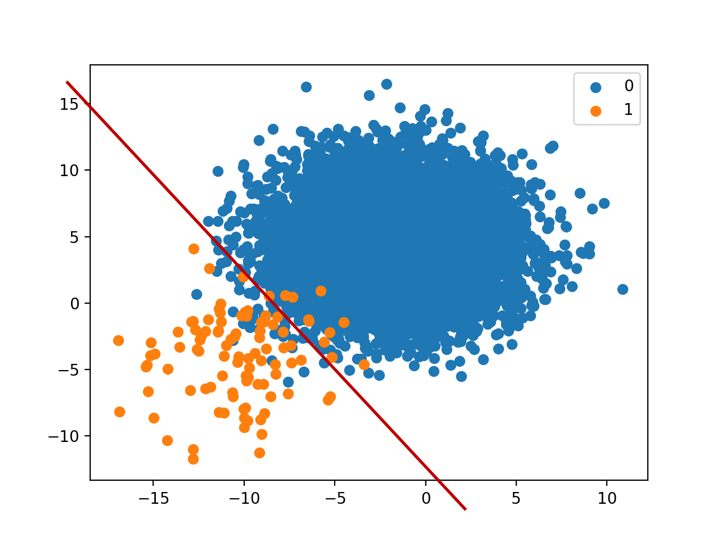

* 아무리 잘 모델링을 하더라도 경계선 근처에 있는 있는 sample은 분류 성능이 떨어질수밖에 없다.
* Label-1: 1.0 ~ 0.5
* Label-0: 0.0 ~ 0.5
* 예측 점수가 0.55 ~ 0.45 인 sample의 경우, 즉 경계선 근처에 있는 경우 정확도가 매우 낮다. 무작위로 주사위를 던지는 수준의 정확도

In [ ]:
score_list = model.predict_proba(test_x)

* model의 예측치를 0.55 ~ 0.50, 0.45 ~ 0.50 2분류로 나눠서 임의로 지정하고 submission 제출을 통해서 best random값을 찾는다.

In [ ]:
score_ranges = [
    (0.55, 0.50, 999, 30), # label 1 min
    (0.50, 0.45, 2000000, 9)  # label 0
]
for up, down, seed, random_range in score_ranges:
    indexes = np.where(np.logical_and(score_list[:,0] < up, score_list[:,0] > down))[0]
    np.random.seed(seed)
    rand_val = np.random.randint(0,random_range,size=len(indexes))
    rand_threshold = np.random.randint(1, random_range -1)
    rand_val[rand_val<rand_threshold] = 0;
    rand_val[rand_val>=rand_threshold] = 1
    prediction[indexes] = rand_val

## Step 7: 제출

In [ ]:
submission = pd.read_csv(os.path.join(dirname, 'sample_submission.csv'))
submission['prediction'] = prediction
submission.to_csv('submission.csv', index=False)
